### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by pushing the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [3]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [4]:
sample_data.shape

(200, 4)

`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

The null hypothesis will be there is no difference between height of coffee drinkers and non-coffee drinkers. While the alternate hypothesis is that there is a difference between the height of coffee drinkers and non-coffee drinkers.

$$H_0 : \mu_{coff} - \mu_{non} = 0$$
$$H_1 : \mu_{coff} - \mu_{non} \neq 0$$

where $\mu_{coff}$ and $\mu_{non}$ are population mean height for coffee and non-coffee drinkers repectively.

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

The null hypothesis will be that the average height of coffee drinkers will be greater or equal than the average height of non-coffee drinkers. The alternate hypothesis is that the average height of coffee drinkers will be less than the average height of non-coffee drinkers.

$$H_0: \mu_{coff} - \mu_{non} \ge 0$$
$$H_1: \mu_{coff} - \mu_{non} < 0$$

where $\mu_{coff}$ and $\mu_{non}$ are population mean height for coffee and non-coffee drinkers repectively.

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [21]:
non_coff_means, coff_means, diffs = [], [], []

for i in range(10000):
    # why sample of sample?
    boot_sample = sample_data.sample(200, replace=True)
    coff_mean = boot_sample[boot_sample['drinks_coffee'] == True]['height'].mean()
    non_coff_mean = boot_sample[boot_sample['drinks_coffee'] == False]['height'].mean()
    diff = coff_mean - non_coff_mean
    coff_means.append(coff_mean)
    non_coff_means.append(non_coff_mean)
    diffs.append(diff)

In [22]:
coff_means

[68.108383061395969,
 68.218860523135248,
 68.296482046511898,
 68.198592792111597,
 67.732155663081912,
 68.006352414129012,
 67.913530135328799,
 68.301061249012321,
 68.054058729895303,
 67.702255251761628,
 67.584663473487723,
 68.242080372830117,
 67.747226945636399,
 68.477447155579128,
 68.107771522434192,
 68.115308499646702,
 68.14211242104507,
 68.019247356419072,
 67.992548355980716,
 68.420916289923895,
 67.983013233763984,
 68.402047841366013,
 68.103929602781704,
 68.263335617900282,
 68.009527976888307,
 67.822383121260629,
 67.958995586896492,
 68.521166822405419,
 68.071104497913311,
 68.111345912275425,
 68.395344056505607,
 68.17194799801689,
 68.402523485825654,
 68.002726333127981,
 68.53447932258517,
 68.564935198763507,
 67.944530830863926,
 68.506694970569455,
 68.343898802638662,
 68.361316400447137,
 68.04125469822219,
 68.474389606270265,
 67.913820356518315,
 68.34182148552982,
 68.388988008141126,
 67.836086938271251,
 67.691763968936826,
 67.98512104998241

In [23]:
np.std(coff_means)

0.24772119091387987

In [24]:
np.std(non_coff_means)

0.40462299797197154

In [25]:
np.std(diffs)

0.47119955171050643

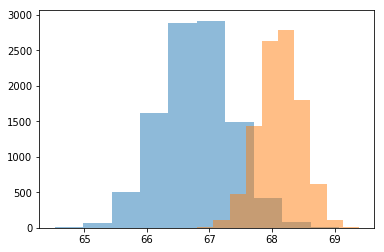

In [20]:
plt.hist(non_coff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5);
# They look pretty normal to me!

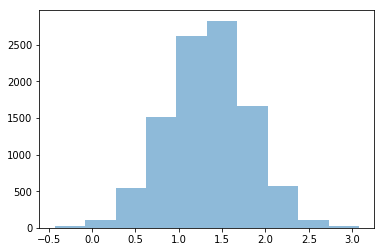

In [14]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

If there are no differences between the means of coffee drinkers and non-coffee drinkers, then the mean of the differences will be 0. By the central limit theorem, since the number of samples is large, we expect the distribution to be normal. The standard deviation of this distribution is the same as before.n

In [26]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

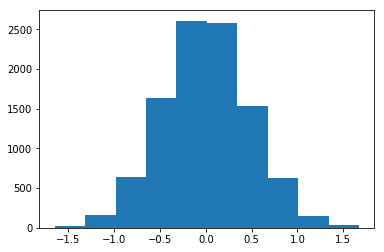

In [27]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null